In [4]:
!pip install pandas_datareader


In [5]:
import pandas_datareader as pdr
key=""
ticker='NVDA'

In [6]:
df = pdr.get_data_tiingo(ticker, api_key=key)

D:\python\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [7]:
filename=ticker+'.csv'
df.to_csv(filename)


In [8]:
import pandas as pd

In [9]:
df=pd.read_csv(filename)

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NVDA,2019-01-08 00:00:00+00:00,139.83,146.78,136.90,146.69,19650429,34.685857,36.409855,33.959049,36.387530,78601716,0.0,1.0
1,NVDA,2019-01-09 00:00:00+00:00,142.58,144.49,139.86,141.90,15431475,35.368015,35.841804,34.693299,35.199336,61725900,0.0,1.0
2,NVDA,2019-01-10 00:00:00+00:00,145.23,145.58,139.36,141.80,13078906,36.025367,36.112187,34.569270,35.174530,52315624,0.0,1.0
3,NVDA,2019-01-11 00:00:00+00:00,148.83,149.75,143.21,144.33,21869066,36.918373,37.146586,35.524291,35.802115,87476264,0.0,1.0
4,NVDA,2019-01-14 00:00:00+00:00,150.44,151.46,145.77,146.72,18254249,37.317745,37.570764,36.159318,36.394972,73016996,0.0,1.0


In [11]:
df1=df.reset_index()['adjClose']

In [12]:
df1

0        34.685857
1        35.368015
2        36.025367
3        36.918373
4        37.317745
           ...    
1253    495.220000
1254    481.680000
1255    475.690000
1256    479.980000
1257    490.970000
Name: adjClose, Length: 1258, dtype: float64

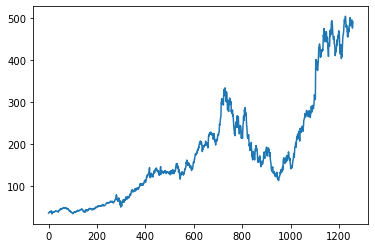

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.00433072],
       [0.0057778 ],
       [0.00717226],
       ...,
       [0.93984607],
       [0.94894658],
       [0.97226   ]])

In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 441)

In [19]:
train_data


array([[0.00433072],
       [0.0057778 ],
       [0.00717226],
       [0.00906662],
       [0.00991382],
       [0.00961388],
       [0.00907189],
       [0.01058738],
       [0.01332894],
       [0.00903505],
       [0.00930868],
       [0.01380779],
       [0.01502334],
       [0.00337302],
       [0.        ],
       [0.00304676],
       [0.00639347],
       [0.00690916],
       [0.0092508 ],
       [0.00965598],
       [0.01126093],
       [0.00832467],
       [0.00871932],
       [0.00781424],
       [0.01029796],
       [0.01119778],
       [0.01206603],
       [0.01354468],
       [0.01317634],
       [0.0141814 ],
       [0.01271853],
       [0.01451817],
       [0.01425507],
       [0.01341839],
       [0.0125291 ],
       [0.01200815],
       [0.01316174],
       [0.01333557],
       [0.01319862],
       [0.01084401],
       [0.00937436],
       [0.01010128],
       [0.01563224],
       [0.01635916],
       [0.01957238],
       [0.0179605 ],
       [0.02019922],
       [0.019

In [20]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 17s 511ms/step - loss: 0.0223 - val_loss: 0.0625
Epoch 2/100
12/12 [==============================] - 4s 313ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 3/100
12/12 [==============================] - 4s 317ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 4/100
12/12 [==============================] - 3s 282ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 5/100
12/12 [==============================] - 3s 268ms/step - loss: 9.2326e-04 - val_loss: 0.0056
Epoch 6/100
12/12 [==============================] - 3s 271ms/step - loss: 8.4775e-04 - val_loss: 0.0075
Epoch 7/100
12/12 [==============================] - 3s 269ms/step - loss: 8.3296e-04 - val_loss: 0.0093
Epoch 8/100
12/12 [==============================] - 4s 365ms/step - loss: 8.6638e-04 - val_loss: 0.0074
Epoch 9/100
12/12 [==============================] - 4s 334ms/step - loss: 7.7377e-04 - val_loss: 0.0075
Epoch 10/100
12/12 [==============================] - 3s 277ms/step - 

12/12 [==============================] - 3s 283ms/step - loss: 2.9091e-04 - val_loss: 0.0082
Epoch 79/100
12/12 [==============================] - 3s 280ms/step - loss: 3.4497e-04 - val_loss: 0.0067
Epoch 80/100
12/12 [==============================] - 4s 352ms/step - loss: 3.4049e-04 - val_loss: 0.0054
Epoch 81/100
12/12 [==============================] - 5s 381ms/step - loss: 2.3814e-04 - val_loss: 0.0043
Epoch 82/100
12/12 [==============================] - 4s 365ms/step - loss: 3.0691e-04 - val_loss: 0.0090
Epoch 83/100
12/12 [==============================] - 4s 351ms/step - loss: 2.4535e-04 - val_loss: 0.0050
Epoch 84/100
12/12 [==============================] - 4s 316ms/step - loss: 2.4068e-04 - val_loss: 0.0084
Epoch 85/100
12/12 [==============================] - 4s 303ms/step - loss: 2.4484e-04 - val_loss: 0.0059
Epoch 86/100
12/12 [==============================] - 3s 284ms/step - loss: 2.3769e-04 - val_loss: 0.0070
Epoch 87/100
12/12 [==============================] - 4s 32

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.11.0'

In [31]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 72ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

160.63622143053374

In [34]:
math.sqrt(mean_squared_error(ytest,test_predict))

314.81240366941523

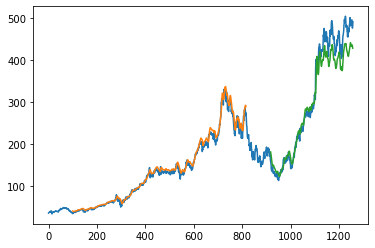

In [35]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

441

In [37]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.858737522336642,
 0.8627037317467899,
 0.8530745388472976,
 0.8500521600187424,
 0.8491083294371496,
 0.9269054209681963,
 0.8993540518574311,
 0.9300656626908851,
 0.9310625174623334,
 0.906777438453756,
 0.9241057437376284,
 0.965443402242023,
 0.9756240467172012,
 0.9775541272323135,
 0.9596107413447589,
 0.9604379187084998,
 0.9289839692153709,
 0.9115905566576068,
 0.8974000773877767,
 0.8890427547685651,
 0.8825096193200422,
 0.8955546787383122,
 0.8975909806963347,
 0.8619344849529078,
 0.8633344425489289,
 0.853874123035921,
 0.8267022187839362,
 0.8007817917771783,
 0.8133601986634412,
 0.826341623645596,
 0.8197448537607457,
 0.8315596474129889,
 0.8447319757037017,
 0.8534286819824777,
 0.8806430091918019,
 0.8538104885995935,
 0.8649253034537201,
 0.878649130191331,
 0.9014302583462702,
 0.8910578452478117,
 0.902193871580502,
 0.9235750421394201,
 0.9265234376826809,
 0.8950456032489658,
 0.9084936807631274,
 0.8627405211444791,
 0.8257901251986979,
 0.8237750347194512,

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.86270373 0.85307454 0.85005216 0.84910833 0.92690542 0.89935405
 0.93006566 0.93106252 0.90677744 0.92410574 0.9654434  0.97562405
 0.97755413 0.95961074 0.96043792 0.92898397 0.91159056 0.89740008
 0.88904275 0.88250962 0.89555468 0.89759098 0.86193448 0.86333444
 0.85387412 0.82670222 0.80078179 0.8133602  0.82634162 0.81974485
 0.83155965 0.84473198 0.85342868 0.88064301 0.85381049 0.8649253
 0.87864913 0.90143026 0.89105785 0.90219387 0.92357504 0.92652344
 0.8950456  0.90849368 0.86274052 0.82579013 0.82377503 0.80863004
 0.84231387 0.85690736 0.81694494 0.78612466 0.78981546 0.80383624
 0.79575467 0.82852641 0.85357716 0.88537317 0.90119693 0.90552407
 0.91865398 0.9266295  0.95600739 0.96205266 0.98402776 0.96773734
 0.98029454 0.97643405 1.         0.99013666 0.96408897 0.94415018
 0.95403473 0.94510469 0.95187115 0.92281143 0.92270537 0.89608497
 0.91856913 0.89601939 0.91920553 0.93850964 0.91986314 0.94171284
 0.95085578 0.95641366 0.96786884 0.99304903 0.9830

7 day output [[0.6171495]]
8 day input [0.90677744 0.92410574 0.9654434  0.97562405 0.97755413 0.95961074
 0.96043792 0.92898397 0.91159056 0.89740008 0.88904275 0.88250962
 0.89555468 0.89759098 0.86193448 0.86333444 0.85387412 0.82670222
 0.80078179 0.8133602  0.82634162 0.81974485 0.83155965 0.84473198
 0.85342868 0.88064301 0.85381049 0.8649253  0.87864913 0.90143026
 0.89105785 0.90219387 0.92357504 0.92652344 0.8950456  0.90849368
 0.86274052 0.82579013 0.82377503 0.80863004 0.84231387 0.85690736
 0.81694494 0.78612466 0.78981546 0.80383624 0.79575467 0.82852641
 0.85357716 0.88537317 0.90119693 0.90552407 0.91865398 0.9266295
 0.95600739 0.96205266 0.98402776 0.96773734 0.98029454 0.97643405
 1.         0.99013666 0.96408897 0.94415018 0.95403473 0.94510469
 0.95187115 0.92281143 0.92270537 0.89608497 0.91856913 0.89601939
 0.91920553 0.93850964 0.91986314 0.94171284 0.95085578 0.95641366
 0.96786884 0.99304903 0.98301514 0.95134368 0.96999017 0.96659605
 0.97612082 0.97904825 0

15 day output [[0.5863916]]
16 day input [0.91159056 0.89740008 0.88904275 0.88250962 0.89555468 0.89759098
 0.86193448 0.86333444 0.85387412 0.82670222 0.80078179 0.8133602
 0.82634162 0.81974485 0.83155965 0.84473198 0.85342868 0.88064301
 0.85381049 0.8649253  0.87864913 0.90143026 0.89105785 0.90219387
 0.92357504 0.92652344 0.8950456  0.90849368 0.86274052 0.82579013
 0.82377503 0.80863004 0.84231387 0.85690736 0.81694494 0.78612466
 0.78981546 0.80383624 0.79575467 0.82852641 0.85357716 0.88537317
 0.90119693 0.90552407 0.91865398 0.9266295  0.95600739 0.96205266
 0.98402776 0.96773734 0.98029454 0.97643405 1.         0.99013666
 0.96408897 0.94415018 0.95403473 0.94510469 0.95187115 0.92281143
 0.92270537 0.89608497 0.91856913 0.89601939 0.91920553 0.93850964
 0.91986314 0.94171284 0.95085578 0.95641366 0.96786884 0.99304903
 0.98301514 0.95134368 0.96999017 0.96659605 0.97612082 0.97904825
 0.98127565 0.98127565 0.95255284 0.93984607 0.94894658 0.97226
 0.83208382 0.80624342 0.

23 day output [[0.5805626]]
24 day input [0.85387412 0.82670222 0.80078179 0.8133602  0.82634162 0.81974485
 0.83155965 0.84473198 0.85342868 0.88064301 0.85381049 0.8649253
 0.87864913 0.90143026 0.89105785 0.90219387 0.92357504 0.92652344
 0.8950456  0.90849368 0.86274052 0.82579013 0.82377503 0.80863004
 0.84231387 0.85690736 0.81694494 0.78612466 0.78981546 0.80383624
 0.79575467 0.82852641 0.85357716 0.88537317 0.90119693 0.90552407
 0.91865398 0.9266295  0.95600739 0.96205266 0.98402776 0.96773734
 0.98029454 0.97643405 1.         0.99013666 0.96408897 0.94415018
 0.95403473 0.94510469 0.95187115 0.92281143 0.92270537 0.89608497
 0.91856913 0.89601939 0.91920553 0.93850964 0.91986314 0.94171284
 0.95085578 0.95641366 0.96786884 0.99304903 0.98301514 0.95134368
 0.96999017 0.96659605 0.97612082 0.97904825 0.98127565 0.98127565
 0.95255284 0.93984607 0.94894658 0.97226    0.83208382 0.80624342
 0.76760769 0.72751236 0.69124281 0.66065437 0.63606954 0.61714947
 0.60325909 0.59364372

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
len(df1)

1258

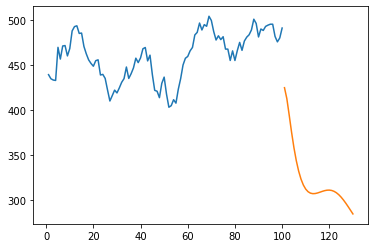

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [43]:
print(df1[1158:].flatten())
print(day_new)
print(np.array(lst_output).flatten())
print(day_pred)

[0.86270373 0.85307454 0.85005216 0.84910833 0.92690542 0.89935405
 0.93006566 0.93106252 0.90677744 0.92410574 0.9654434  0.97562405
 0.97755413 0.95961074 0.96043792 0.92898397 0.91159056 0.89740008
 0.88904275 0.88250962 0.89555468 0.89759098 0.86193448 0.86333444
 0.85387412 0.82670222 0.80078179 0.8133602  0.82634162 0.81974485
 0.83155965 0.84473198 0.85342868 0.88064301 0.85381049 0.8649253
 0.87864913 0.90143026 0.89105785 0.90219387 0.92357504 0.92652344
 0.8950456  0.90849368 0.86274052 0.82579013 0.82377503 0.80863004
 0.84231387 0.85690736 0.81694494 0.78612466 0.78981546 0.80383624
 0.79575467 0.82852641 0.85357716 0.88537317 0.90119693 0.90552407
 0.91865398 0.9266295  0.95600739 0.96205266 0.98402776 0.96773734
 0.98029454 0.97643405 1.         0.99013666 0.96408897 0.94415018
 0.95403473 0.94510469 0.95187115 0.92281143 0.92270537 0.89608497
 0.91856913 0.89601939 0.91920553 0.93850964 0.91986314 0.94171284
 0.95085578 0.95641366 0.96786884 0.99304903 0.98301514 0.95134

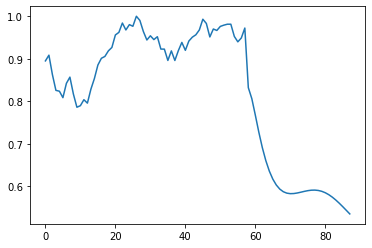

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

In [46]:
data=pd.DataFrame(np.array(df3[1200:])).to_csv("data.csv")

In [47]:
df=pd.read_csv("data.csv")

In [48]:
df.to_json(orient='values')

'[[0,454.5709525446],[1,460.910407988],[2,439.3422606828],[3,421.9237569251],[4,420.9738385227],[5,413.834451793],[6,429.7130878248],[7,436.5924968864],[8,417.7541150956],[9,403.2253631093],[10,404.9652136569],[11,411.5746459094],[12,407.7649731587],[13,423.2136461241],[14,435.0226317372],[15,450.011344213],[16,457.4707034572],[17,459.5105282371],[18,465.6999965643],[19,469.4596736096],[20,483.3084840026],[21,486.1582392098],[22,496.5173493665],[23,488.8380090187],[24,494.7575005368],[25,492.9376568606],[26,504.0467025982],[27,499.397101997],[28,487.1181567533],[29,477.71896414],[30,482.3785638823],[31,478.1689254885],[32,481.3586514924],[33,467.6598282156],[34,467.6098325102],[35,455.0609104574],[36,465.66],[37,455.03],[38,465.96],[39,475.06],[40,466.27],[41,476.57],[42,480.88],[43,483.5],[44,488.9],[45,500.77],[46,496.04],[47,481.11],[48,489.9],[49,488.3],[50,492.79],[51,494.17],[52,495.22],[53,495.22],[54,481.68],[55,475.69],[56,479.98],[57,490.97],[58,424.8906201028],[59,412.709393

In [49]:
df3=scaler.inverse_transform(df3).tolist()

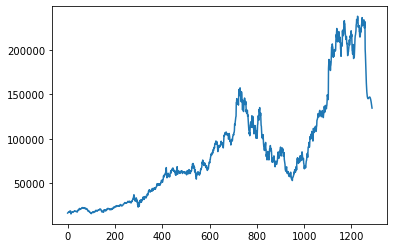

In [50]:
plt.plot(df3)